# Принятие решений в бизнесе. А/В тестирование

### Описание проекта

Аналитика крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

<b>Цель исследования:</b> 
- Приоритизировать гипотезы.
- Запустить A/B-тест.
- Проанализировать результаты.

<b>Ход исследования:</b> 

*1. Откроем файлы с данными, изучим общую информацию и подготовим данные*

Путь к файлам:

`/datasets/hypothesis.csv /datasets/orders.csv /datasets/hypothesis.csv` - гипотезы

`/datasets/hypothesis.csv /datasets/orders.csv /datasets/visitors.csv` - пользователи

`/datasets/hypothesis.csv /datasets/orders.csv /datasets/orders.csv` - заказы

*2. Проведем приоритизацию гипотез*

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета

Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета

Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

*3. Анализ A/B-теста*

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. 

Проанализируем A/B-тест:

Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем решение по результатам теста. Варианты решений:

- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

*4. Общий вывод*

### Описание данных

Файл `/datasets/hypothesis.csv`. 

`Hypothesis` — краткое описание гипотезы

`Reach` — охват пользователей по 10-балльной шкале

`Impact` — влияние на пользователей по 10-балльной шкале

`Confidence` — уверенность в гипотезе по 10-балльной шкале

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл `/datasets/orders.csv`. 

`transactionId` — идентификатор заказа

`visitorId` — идентификатор пользователя, совершившего заказ

`date` — дата, когда был совершён заказ

`revenue` — выручка заказа

`group` — группа A/B-теста, в которую попал заказ

Файл `/datasets/visitors.csv`.

`date` — дата

`group` — группа A/B-теста

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

# Откроем файлы с данными, изучим общую информацию и подготовим данные

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Загрузим файлы с данными.

In [2]:
try:
    hypothesis, visitors, orders = (
    pd.read_csv('C:/Users/ACER/Desktop/hypothesis.csv'), # гипотезы
    pd.read_csv('C:/Users/ACER/Desktop/visitors.csv', sep=','),  # пользователи
    pd.read_csv('C:/Users/ACER/Desktop/orders.csv', sep=',')  # заказы
)
except:
    hypothesis, visitors, orders = (
    pd.read_csv('/datasets/hypothesis.csv'), # гипотезы
    pd.read_csv('/datasets/visitors.csv'),  # пользователи
    pd.read_csv('/datasets/orders.csv') # заказы
)

### Часть 1. Приоритизация гипотез.

Посмотрим на файл с гипотезами.

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для удобства приведем названия столбцов в файле к нижнему регистру. Применим фреймворк `ICE` и отсортируем.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/(hypothesis['efforts'])
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее приоритетными гипотезами по `ICE` являются:

8.Запустить акцию, дающую скидку на товар в день рождения

0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Применим фреймворк `RICE` и отсортируем.

In [5]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/(hypothesis['efforts'])
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Наиболее приоритетными гипотезами по `RICE` являются:

7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Наболее перспективная гипотеза по `ICE` потеряла свой приоритет при применении фреймворка `RICE`. Оказал влияние параметр `reach` - охват пользователей. С учитетом результатов применения обоих фреймворков приоритизаций гипотез, самыми перспективными являются:

7.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

0.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

6.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Часть 2. Анализ A/B-теста

Посмотрим общую информацию о файлах `orders` и `visitors`.

In [6]:
display(orders.head(5))
visitors.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
display(visitors.info())
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
display(orders.describe())
visitors.describe()

,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


In [9]:
print(orders.duplicated().sum())
visitors.duplicated().sum()

0


0

In [10]:
display(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

Файлы осмотрели, пропусков и явных дубликатов нет. 

Посмотрим, не дублируются ли пользователи в группах А и В.

In [11]:
double_visitors = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
double_visitors
print(np.sum(double_visitors!=0))

58


Нашлось 58 пользователей, которые попали в обе группы. Для чистоты эксперимента необходимо от них избавиться.

In [12]:
orders = orders[~orders['visitorId'].isin(double_visitors)]
#проверим
np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

array([], dtype=int64)

Теперь необходимо исправить регистр и тип данных содержащих даты.

In [13]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}) 

In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [15]:
# создаем массив уникальных пар значений дат и групп теста
grouped_data = orders[['date','group']].drop_duplicates() 
# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = grouped_data.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = grouped_data.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


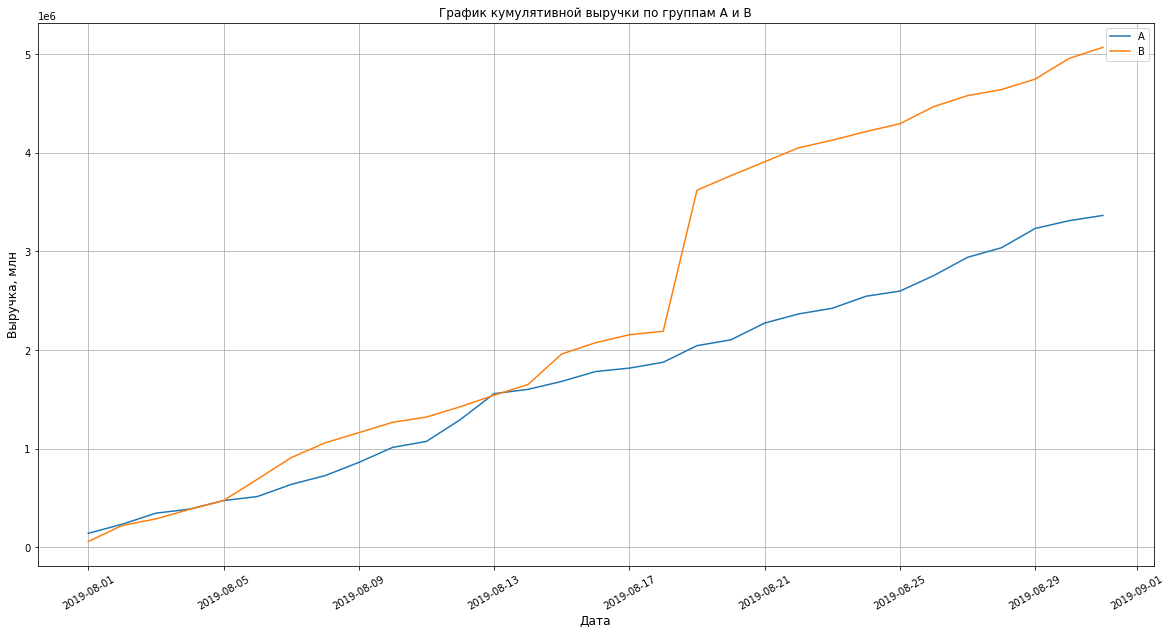

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(20, 10))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.xticks(rotation=30)
plt.grid(visible=True)
plt.title('График кумулятивной выручки по группам А и В')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, млн', fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.show()


Выручка почти равномерно увеличивается в течение всего теста.

Однако, график выручки группы B в точке 2019-08-18 резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Построим графики среднего чека по группам.

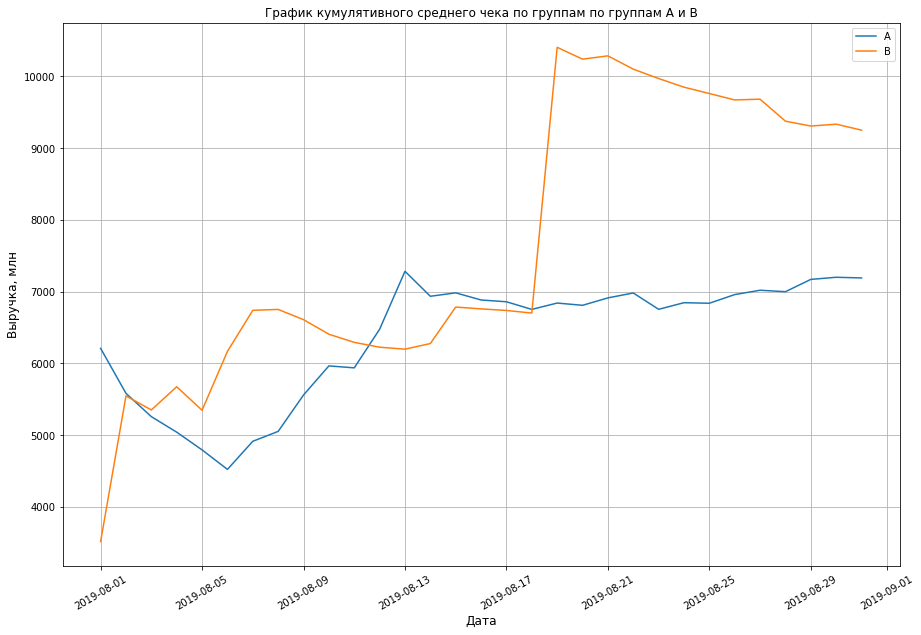

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xticks(rotation=30)
plt.grid(visible=True)
plt.title('График кумулятивного среднего чека по группам по группам А и В')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, млн', fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.show()


По группе А средний чек стабилизируется к концу теста, есть тенденция к росту. По группе В значение среднего чека, после резкого скачка, начало снижаться, что говорит в пользу предположения о появлении очень дорогого заказа.

Построим график относительного различия для среднего чека.

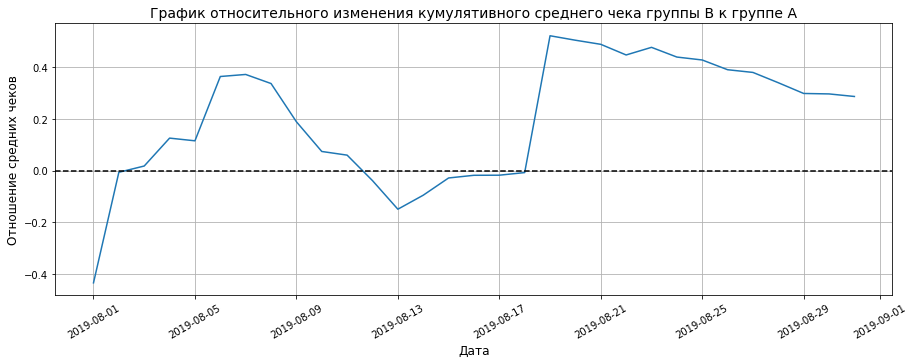

In [18]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 5))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/
          merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/
          merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(visible=True)
plt.xticks(rotation=30)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.show()

В нескольких точках график различия между сегментами резко «скачет», то есть разница в средних чеках групп А и B значительно увеличивается. Вероятно, здесь и спрятаны большие заказы и выбросы.

Построим график кумулятивного среднего количества заказов на посетителя.

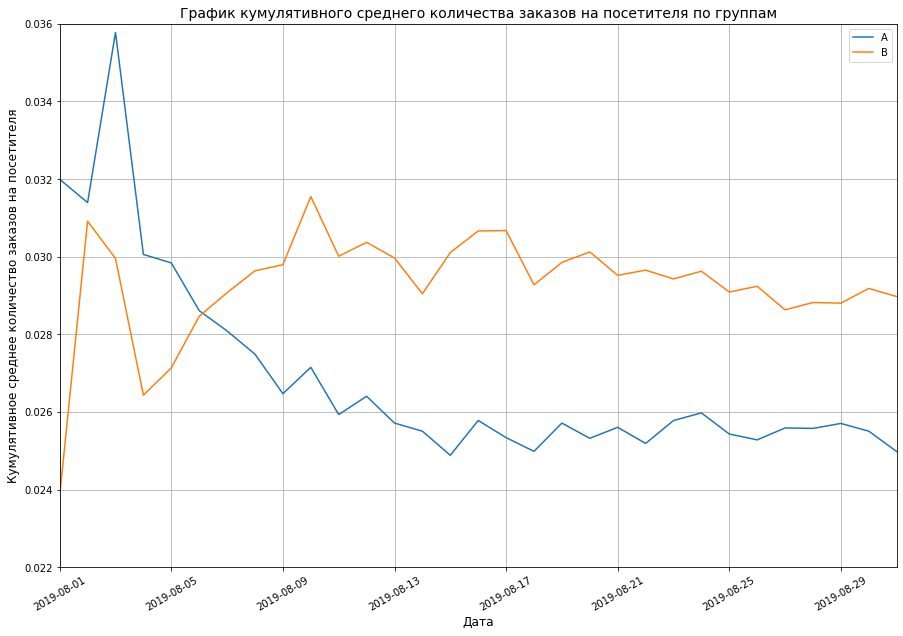

In [19]:
# считаем кумулятивное среднее количества заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
plt.figure(figsize=(15, 10))
# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.022, 0.036]) 
plt.xticks(rotation=30)
plt.grid(visible=True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивное среднее количество заказов на посетителя', fontsize=12)
plt.legend()
plt.show()

Изначально группы колебались около одного значения кумулятивного среднего, но затем среднее количество заказов на посетителя группы B начало расти и далее зафиксировалось, а среднее количество заказов на посетителя группы A просело относительно первоначальных значений и также зафиксировалось.
По итогам среднее количество заказов на посетителя группы В выше.

Построим график относительного различия кумулятивного среднего количества заказов на посетителя:

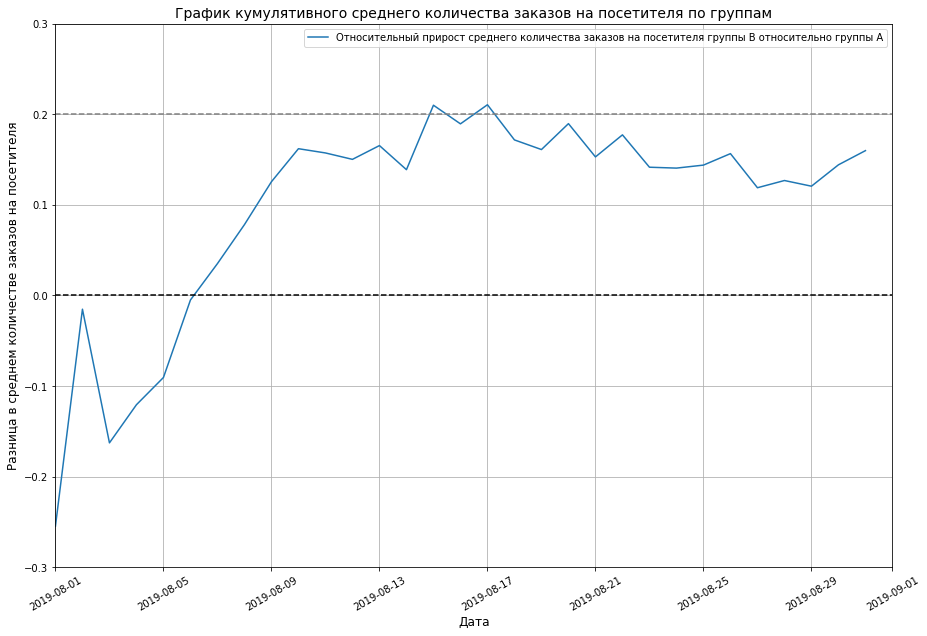

In [20]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']],
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))

plt.plot(merged_cumulative_conversions['date'], 
merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1,
label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3]) 
plt.xticks(rotation=30)
plt.grid(visible=True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Разница в среднем количестве заказов на посетителя', fontsize=12)
plt.legend()
plt.show()


В самом начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. К концу теста среднее количество заказов на посетителя группы B стабильно выше на 10-15%. 

Построим точечный график количества заказов по пользователям.

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


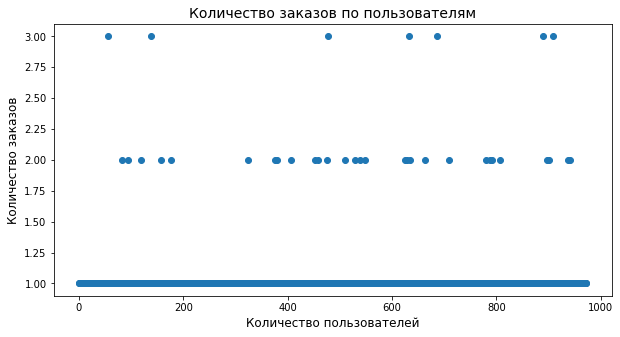

In [21]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))
plt.figure(figsize=(10, 5))
# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Количество заказов по пользователям', fontsize=14)
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.show();

Основная часть пользователей совершает по одному заказу. Некоторая часть по 2 заказа и совсем редко - 3 заказа. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [22]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


Не более 5% пользователей оформляли больше 1 заказа. И 1% пользователей заказывали три раза. 
Разумно выбрать 1 заказ на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Перцентали выбраны верно. Но скорее всего, после обнаружения пользователей, которые вошли в обе группы (что не совсем верно) границы выбросов изменятся. Еще раз перепроверь свое решение после дополнения части с предобработкой.
</div>

Построим точечный график стоимостей заказов.

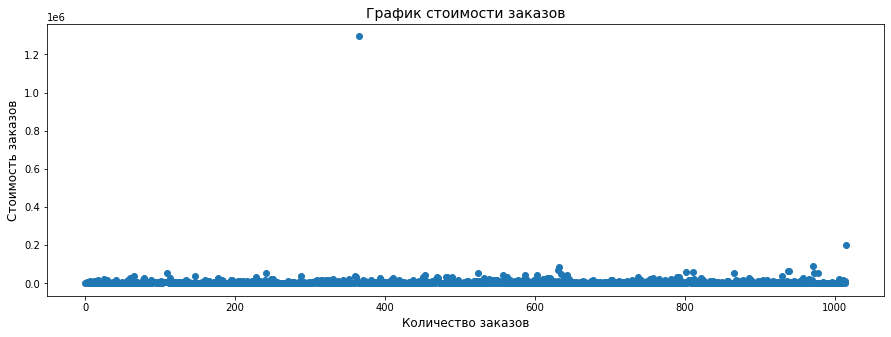

In [23]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов', fontsize=14)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Стоимость заказов', fontsize=12)
plt.show();

Посмотрим детальнее в другом масштабе.

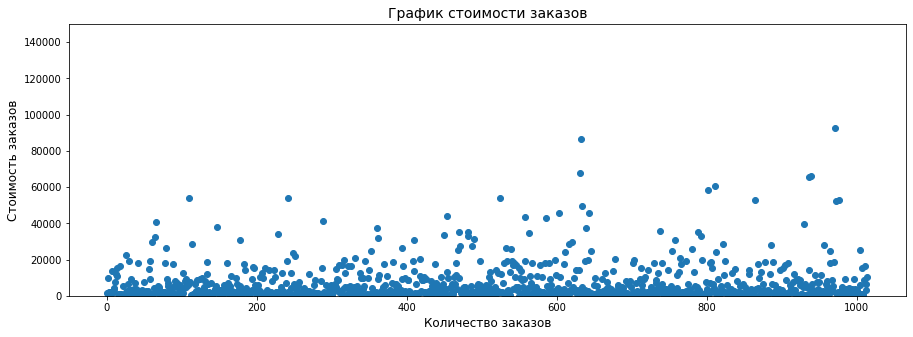

In [24]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 150000)
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов', fontsize=14)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Стоимость заказов', fontsize=12)
plt.show();

По графику можно увидеть единичные очень дорогие заказы. На основании графика можно предположить границу аномальных заказов около 25 000. Но их точная доля неизвестна — значит сразу отбросить их мы не можем.

Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [25]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5%  заказов имеют стоимость от 26785. И 1% заказов имеют стоимость более 53904 руб. 
Разумно выбрать стоимость в 26785 за верхнюю стоимости заказов, и отсеять аномальные заказы по ней. 

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «сырым» данным. 

Сформулируем гипотезы:

*H0* - различий в среднем количестве заказов на пользователя между группами нет.

*H1* - различия в среднем количестве заказов на пользователя между группами есть.

Для расчета статистической значимости различий в количестве заказов на пользователя между группами нам необходимо подготовить имеющиеся данные. Сформируем новый датафрейм со следующими столбцами:

`date` - дата;

`orders_per_date_a` - количество заказов в выбранную дату в группе A;

`revenue_per_date_a` - суммарная выручка в выбранную дату в группе A;

`orders_per_date_b` - количество заказов в выбранную дату в группе B;

`revenue_per_date_b` - суммарная выручка в выбранную дату в группе B;

`orders_cummulative_a` - суммарное число заказов до выбранной даты включительно в группе A;

`revenue_cummulative_a` - суммарная выручка до выбранной даты включительно в группе A;

`orders_cummulative_b` - суммарное число заказов до выбранной даты включительно в группе B;

`revenue_cummulative_b` - суммарная выручка до выбранной даты включительно в группе B;

`visitors_per_date_a` - количество пользователей в выбранную дату в группе A;

`visitors_cummulative_a` - количество пользователей до выбранной даты включительно в группе A;

`visitors_per_date_b` - количество пользователей в выбранную дату в группе B;

`visitors_cummulative_b` - количество пользователей до выбранной даты включительно в группе B.


In [26]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative .columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative .columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative , left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative , left_on='date', right_on='date', how='left')
)

display(data.head(5))


,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [27]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']



Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [28]:
pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')

sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, 
index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, 
index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [29]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительное различие в среднем количестве заказов на пользователя группами по «сырым» данным:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.011
Относительное различие в среднем количестве заказов на пользователя группами по «сырым» данным: 0.160


p-value = 0.011, что меньше 0.05. *H0* об отсутствии различий по «сырым» данным в среднем количестве заказов на пользователя между группами отвергаем. Среднее количество заказов на пользователя группы В больше.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Гипотезы:

*H0* - различий в среднем чеке между группами нет

*H1* - различия в среднем чеке между группами есть

In [30]:
# рассчет статистической значимости различия среднего чека по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

# рассчет относительного различия в среднем чеке между группами
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
Относительное различие в среднем чеке между группами по «сырым» данным: 0.287


p-value = 0.829, что больше 0.05. *Н0* об отсутствуии различий среднего чека групп А и В отвергнуть не можем. 

Согласно наблюдениям по "сырым" данным различие по среднему чеку между группами составляет 28,7 % (в пользу группы B), что не является статистически значимым.

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «очищенным» данным. 

Как мы ранее определили, за аномальных примем записи о заказах и их стомости по 95 перцентилю. Очистим данные от 5% пользователей с наибольшим числом заказов и набольшей стоимостью заказов. Объединим "очищенные" данные в таблице `abnormalUsers`. 

In [31]:

many_orders = np.percentile(orders_by_users['orders'], 95)
expensive_orders = np.percentile(orders['revenue'], 95)

users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
86


Всего 86 аномальных пользователей. Нужно понять, как они повлияли на результаты теста. 

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «очищенным» данным.

*H0* - различий в среднем количестве заказов на пользователя между группами нет.

*H1* - различия в среднем количестве заказов на пользователя между группами есть.

In [32]:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(
        orders_by_users_a['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(orders_by_users_a['orders'])), name='orders')], axis=0)


sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(
        orders_by_users_b['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(orders_by_users_b['orders'])), name='orders')], axis=0)

In [33]:
# рассчет статистической значимости различия в количестве заказов на пользователя по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# рассчет относительного различия в количестве заказов на пользователя между группами
print('Относительное различие в количестве заказов на пользователя между группами по «очищенным» данным:',
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.016
Относительное различие в количестве заказов на пользователя между группами по «очищенным» данным: 0.174


p-value = 0.016, что, опять же, меньше статистической значимости. *Н0* по "очищенным" данным отвергаем. Относительное различие в среднем количестве заказов на пользователя между группами по «очищенным» данным увеличилось.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Гипотезы:

*H0* - различий в среднем чеке между группами нет

*H1* - различия в среднем чеке между группами есть

In [34]:
print('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.727
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.034


p-value = 0.727, *НО* отвергнуть не можем. Как по "сырым", так и по "очищенным" данным различий в среднем чеке между группами нет.

Согласно наблюдениям по "очищенным" данным различие по среднему чеку между группами составляет 3,4 % (в пользу группы А), что не является статистически значимым.

# Решение по результатам теста:

*Остановить тест, зафиксировать победу группы B.*

Есть статистически значимое различие по количеству заказов на пользователя между группами как по «сырым», так и по данным после фильтрации аномалий.

Нет статистически значимого различия по среднему чеку заказов между группами ни по «сырым», ни по данным после фильтрации аномалий.

График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению.

### Общий вывод

Мы проанализировали данные интернет-магазина, провели предобработку данных, провели приоретизацию гипотез и А/В-тестирование.

Часть 1. Приоритезация гипотез. Из гипотез, выдвинутых отделом маркетинга, приоретизируя их по фреймворку `ICE`, следует выделить:

•	"Запустить акцию, дающую скидку на товар в день рождения"

•	"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

•	"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


Из гипотез, выдвинутых отделом маркетинга, приоретизируя их по фреймворку `RICE`, следует выделить:

•	"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

•	"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"

•	"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

Часть 2. А/В-тест.

- Кумулятивный средний чек группы В выше среднего чека группы А.

- Кумулятивное среднее количество заказов на посетителя группы В больше, чем в группе А.

- Есть статистически значимое различие по количеству заказов на пользователя между группами как по «сырым», так и по данным после фильтрации аномалий.

- Нет статистически значимого различия по среднему чеку заказов между группами ни по «сырым», ни по данным после фильтрации аномалий.

- График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению.

По итогам исследования рекомендуется остановить тест и зафиксировать победу группы B. 

*Рекомендации*: проработать повышение среднего чека, т.к. график различия среднего чека говорит о некоторой тенденции к снижению среднего чека группы B.
